In [1]:
import pandas as pd
import numpy as np
from annfuncs import *

In [2]:
df = pd.read_csv("ccpp.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Scale between 0 and 1
# df=(df-df.min())/(df.max()-df.min())

# Scale between -1 and 1
# df = (2*df - (df.min() + df.max()))/(df.max()-df.min())

# Scale between -0.9 and 0.9
df=((df-df.min())/(df.max()-df.min())) * (0.9 - (-0.9)) + (-0.9)
df.head()

,AT,V,AP,RH,PE
0,-0.229462,-0.374733,0.488864,0.248767,0.125166
1,0.291671,0.304270,0.309354,-0.091206,-0.325192
2,-0.731728,-0.450320,-0.041648,0.706488,0.728344
3,0.071388,0.123630,-0.127171,0.332493,-0.274887
4,-0.440567,-0.511174,-0.172160,0.814584,0.378834


In [4]:
df = df.dropna().reset_index(drop=True)

In [5]:
# from sklearn.model_selection import train_test_split

# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Last 10% is put in test set
test_size = round(df.shape[0]/10)
test = df[-test_size:]

rem_size = (df.shape[0] - test.shape[0])
rem = df[:rem_size]

train = rem[rem.index % 5 != 0]  # Excludes every 5th row
val = rem[rem.index % 5 == 0]  # Selects every 5th


In [19]:
x_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

x_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

x_val = val.iloc[:, :-1].values
y_val = val.iloc[:, -1].values

In [15]:
# test_size = round(X.shape[0]/10)
# x_test = X[-test_size:]
# X_rem = X[:(X.shape[0] - x_test)]
# x_train = []
# x_val = []
# for i in X_rem:
#     if i%5==0: x_val.append(i)
#     else: x_train.append(i)




In [20]:
x_train = np.transpose(x_train)
y_train = np.transpose(y_train)
y_train = y_train.reshape(1, -1)
x_test = np.transpose(x_test)
y_test = np.transpose(y_test)
y_test = y_test.reshape(1, -1)
x_val = np.transpose(x_val)
y_val = np.transpose(y_val)
y_val = y_val.reshape(1, -1)

In [21]:
print("No. of features: ", x_train.shape[0])
print("No. of samples in training set: ", x_train.shape[1])
print("No. of samples in testing set: ", x_test.shape[1])
print("No. of samples in validation set: ", x_val.shape[1])

No. of features:  4
No. of samples in training set:  6888
No. of samples in testing set:  957
No. of samples in validation set:  1723


Cost after epoch 0: 0.132708,  Valid err: 0.012873
Cost after epoch 1: 0.070819,  Valid err: 0.006837
Cost after epoch 2: 0.059839,  Valid err: 0.005869
Cost after epoch 3: 0.051689,  Valid err: 0.005603
Cost after epoch 4: 0.044986,  Valid err: 0.005392
Cost after epoch 5: 0.039321,  Valid err: 0.005345
Cost after epoch 6: 0.034498,  Valid err: 0.005272
Cost after epoch 7: 0.030381,  Valid err: 0.005129
Cost after epoch 8: 0.026843,  Valid err: 0.005132
Cost after epoch 9: 0.023859,  Valid err: 0.005064
Cost after epoch 10: 0.021323,  Valid err: 0.005174
Cost after epoch 11: 0.019149,  Valid err: 0.005001
Cost after epoch 12: 0.017345,  Valid err: 0.005021
Cost after epoch 13: 0.015819,  Valid err: 0.005035
Cost after epoch 14: 0.014528,  Valid err: 0.005011
Cost after epoch 15: 0.013479,  Valid err: 0.005017
Cost after epoch 16: 0.012592,  Valid err: 0.005052
Cost after epoch 17: 0.011836,  Valid err: 0.005152
Cost after epoch 18: 0.011225,  Valid err: 0.005062
Cost after epoch 19: 0

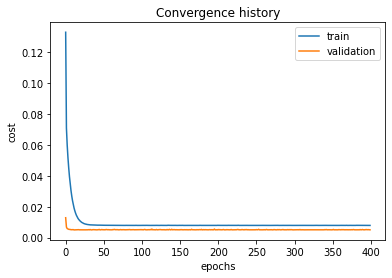

In [152]:
layers_dims = [4,20,20,1]
num_iterations = 400
activation = "tanh"
mini_batch_size = 64
learning_rate = 0.001

parameters = L_layer_model_minib(x_train, y_train,layers_dims,valid=True,valid_x=x_test,valid_y=y_test,num_iterations = num_iterations,
                he_init=True, mini_batch_size = mini_batch_size,
                learning_rate = learning_rate, print_cost = True,regularisation='L2',lambd=0.1,
                optimizer="adam", beta = 0.9, beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,activation=activation,cost_func='mse')


In [153]:
# MAPE

pred_val = predictvals(x_val, parameters, activation=activation)
mape_val = mape_cost(y_val, pred_val)
print("Validation mape : ", mape_val)

pred_test = predictvals(x_test, parameters, activation=activation)
mape_test = mape_cost(y_test, pred_test)
print("Test mape : ", mape_test)


Validation mape :  59.48010073444811
Test mape :  94.25216693085807


In [23]:
# mse = test_regression(x_test, y_test, parameters, activation = "tanh", last_activation = "tanh")

In [157]:
sno = 100
sample_x = x_test[:, sno]
sample_x = sample_x.reshape(sample_x.shape[0], 1)
sample_output, cache = L_model_forward(sample_x, parameters, "tanh")
print("Actual: ", y_test[:, sno][0])
print("Predicted: ", sample_output[0][0])

Actual:  -0.18929801324503315
Predicted:  -0.334927945976258


In [154]:
# Predict on test set
preds, cache = L_model_forward(x_test, parameters, "tanh")
df2 = pd.DataFrame()
df2['predicted'] = preds[0].T.tolist()
df2['actual'] = y_test[0].T.tolist()

In [158]:
# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test.T, preds.T)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9374672332628895


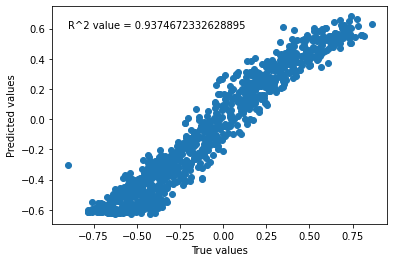

In [167]:
plt.scatter(y_test.T,preds.T)
plt.xlabel("True values")
plt.ylabel("Predicted values")
txt = "R^2 value = " + str(r2)
# plt.title("Custom ANN\n" + txt)
plt.text(-0.9, 0.6, txt, fontsize = 10)
plt.show()

In [25]:
data = np.hstack((y_test.T, preds.T))
result = pd.DataFrame(data=data,columns=['true','pred'])
result.to_csv("result.csv")